In [11]:
import pyautogui
import os
import time
import pydirectinput
import numpy as np
from PIL import Image
import pytesseract
import re
import difflib
import logging
import pygetwindow as gw
import hashlib
import matplotlib.pyplot as plt

        
first_rectangle_top_left_x = 477
first_rectangle_top_left_y = 1007
first_rectangle_bottom_right_x = 1001
first_rectangle_bottom_right_y = 1078

first_rectangle_top_right_x = 1012

width = first_rectangle_bottom_right_x - first_rectangle_top_left_x
height = first_rectangle_bottom_right_y - first_rectangle_top_left_y

class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def __str__(self):
        return f"Rectangle(x={self.x}, y={self.y}, width={self.width}, height={self.height})"
    

reference_rectangle_list = [
Rectangle(489,990, 1003 - 489, 1059 - 990),


Rectangle(489,1062, 1003 - 489, 1131 - 1062),


Rectangle(489,1133, 1003 - 489, 1202 - 1133),


Rectangle(489,1204, 1003 - 489, 1274 - 1204),

###

Rectangle(1017,990, 1553 - 1017, 1059 - 990),


Rectangle(1017,1062, 1553 - 1017, 1131 - 1062),


Rectangle(1017,1133, 1553 - 1017, 1202 - 1133),


Rectangle(1017,1204, 1553 - 1017, 1274 - 1204),

]

veriification_rectangle = Rectangle(467, 83, 657 - 467, 145 - 83)


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # replace with your actual path

custom_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata" --psm 13'

def timer(seconds):
    # Start a 5-second timer
    for i in range(seconds, 0, -1):
        print(f"Remaining: {i} seconds")
        time.sleep(1)

def timed_input(seconds, key):
    pydirectinput.press(key)
    time.sleep(seconds)


class SkillAnalyzer():

    def __init__(self, recipe_controllers):

        self.recipe_controllers = recipe_controllers

    

    def check_window_change(self,active_window_title):
        # Check if the active window has changed
        if gw.getActiveWindow().title != active_window_title:
            print('Active window has changed. Stopping the program.')
            return True
        return False

        

    def define_verification_rectangle(self):
        verify_image = pyautogui.screenshot(region=(veriification_rectangle.x, veriification_rectangle.y, veriification_rectangle.width, veriification_rectangle.height))
        
        # Convert the image to bytes
        image_bytes = verify_image.tobytes()

        # Create a hash of the image
        image_hash = hashlib.sha256(image_bytes).hexdigest()

        self.verification_hash = image_hash


    def verify_rectangle(self):
        verify_image = pyautogui.screenshot(region=(veriification_rectangle.x, veriification_rectangle.y, veriification_rectangle.width, veriification_rectangle.height))
        
        # Convert the image to bytes
        image_bytes = verify_image.tobytes()

        # Create a hash of the image
        image_hash = hashlib.sha256(image_bytes).hexdigest()

        if image_hash != self.verification_hash:
            print('Verification rectangle has changed. Stopping the program.')
            plt.imshow(verify_image)
            plt.show()
            return True

        return False


    def changeSpecialFusion(self):
        pydirectinput.keyDown('right')
        pydirectinput.keyUp('right')
        # Press the 'l' key
        pydirectinput.press('l')
        # Press the 'm' key
        timed_input(0.1, 'm')
        pydirectinput.keyDown('right')
        pydirectinput.keyUp('right')


    def change3wayFusion(self):
        for i in range(3):
            # Press the 'l' key
            timed_input(0.01, 'l')

        timed_input(0.01, 'm')
        
        for i in range(2):
            # Press the 'l' key
            timed_input(0.01, 'w')
            
        
        timed_input(0.01, 'm')

        for i in range(1):
            # Press the 'l' key
            timed_input(0.01, 'w')
            
        # Press the 'm' key
        pydirectinput.keyDown('right')
        pydirectinput.keyUp('right')
        timed_input(0.01, 'm')
        pydirectinput.keyDown('right')
        pydirectinput.keyUp('right')


    def get_images(self, recipe_controller):

        found_skills = []
        rec_counter = 0
        for rectangle in recipe_controller.rectangle_list:

            # Take a screenshot of the rectangle
            cropped_img = pyautogui.screenshot(region=(rectangle.x, rectangle.y, rectangle.width, rectangle.height))
            
            directory = "C:\\Users\\Eduardo\\Pictures\\Screenshots\\persona3\\{}\\{}\\".format(recipe_controller.logger_name,recipe_controller.result_persona_name)

            if not os.path.exists(directory):
                os.makedirs(directory)
            
            directory = directory + "{}.png".format(rec_counter)

            cropped_img.save(directory)

            #plt.imshow(cropped_img)
            #plt.show()
            #test
            #cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))

            # Convert the image to RGB
            rgb_img = cropped_img.convert('RGB')

            hex_color = '65dfcd'

            # Convert the target hex color to RGB
            target_r, target_g, target_b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            target_color = np.array([target_r, target_g, target_b])

            # Convert the image to a NumPy array
            img_array = np.array(rgb_img)

            # Calculate the Euclidean distance between each pixel's color and the target color
            color_distance = np.linalg.norm(img_array - target_color, axis=2)

            # Create a mask for pixels that are similar to the target color
            mask = color_distance < 65

            # Change the color of the pixels based on the mask
            img_array[mask] = [0, 0, 0]  # black
            img_array[~mask] = [255, 255, 255]  # white

            # Convert the NumPy array back to an image
            rgb_img = Image.fromarray(img_array)

            # Convert the image to grayscale
            gray_img = rgb_img.convert('L')

            # Apply a threshold to make it binary
            binary_img = gray_img.point(lambda x: 0 if x<128 else 255, '1')

            text = pytesseract.image_to_string(binary_img, config=custom_config)
            
            # 'remove all characters that are not letters, numbers, ' ' or '-'
            text = re.sub(r'[^a-zA-Z0-9 -]', '', text)

            # remove ' ' and '-' from the beginning and end of the string
            text = text.strip(' -')

            match = difflib.get_close_matches(text, recipe_controller.skill_set, n=1, cutoff=0.0)

            if match:
                best_match = match[0]
            else:
                best_match = ''  # No match found
                
            rec_counter += 1
            found_skills.append(best_match)
        
        return found_skills
    
    def verify_duplicate(self, predictions):
        return len(predictions) != len(set(predictions))
        
    
    def cycle(self):

        timer(3)
        # Press the right key
        #pydirectinput.keyDown('right')
        #pydirectinput.keyUp('right')
        # Get the title of the currently active window
        self.define_verification_rectangle()
        active_window_title = gw.getActiveWindow().title
        predict = True

        for recipe_controller in self.recipe_controllers[1:]:
            pydirectinput.keyDown(recipe_controller.save_state_slot_load)
            pydirectinput.keyUp(recipe_controller.save_state_slot_load)
            time.sleep(1)
            counter = 0
            while counter < 1000:
                
                if self.check_window_change(active_window_title):
                    break

                if self.verify_rectangle():
                    pydirectinput.keyDown(recipe_controller.save_state_slot_load)
                    pydirectinput.keyUp(recipe_controller.save_state_slot_load)
                    predict = False
                    counter -=1
                #print("wating to save in key: ".format(recipe_controller.save_state_slot))
                pydirectinput.keyDown(recipe_controller.save_state_slot_save)
                pydirectinput.keyUp(recipe_controller.save_state_slot_save)

                predictions = self.get_images(recipe_controller)
                
                if self.verify_duplicate(predictions):
                    predict = False
                    counter -=1
                    break

                # Log the predictions vector
                if predict:
                    recipe_controller.logger.info(f'{predictions}')
                    print(predictions)
                else:
                    predict = True

                if self.check_window_change(active_window_title):
                    break
                
                if recipe_controller.fusion_spread_type == 'special':
                    self.changeSpecialFusion()
                    counter +=1
                elif recipe_controller.fusion_spread_type == '3way':
                    self.change3wayFusion()
                    counter +=1
            print('swaping to next save state')
        

        
class RecipeController():

    def __init__(self, recipe_file_name,skill_set, base_skills_amount, inherit_slots_amount, result_persona_name, fusion_spread_type, save_state_slot ):

        # Unique logger name for each RecipeController instance
        logger_name = f'Logger_{recipe_file_name}_{save_state_slot}_{result_persona_name}'
        self.logger = logging.getLogger(logger_name)

        self.logger_name = logger_name

        # Prevent logger from propagating messages to ancestor loggers
        self.logger.propagate = False

        # Clear existing handlers (if any) and set a new file handler
        self.logger.handlers.clear()
        self.logger.setLevel(logging.INFO)
        file_handler = logging.FileHandler(f'predictions_{recipe_file_name}_{save_state_slot}.log')
        self.logger.addHandler(file_handler)

        self.skill_set = skill_set
        self.base_skills_amount = base_skills_amount

        #TODO Telos has special ammount of inherits
        if result_persona_name == 'orpheus telos':
            inherit_slots_amount = 8
        self.inherit_slots_amount = inherit_slots_amount

        start, end = self.base_skills_amount, self.inherit_slots_amount + self.base_skills_amount
        number_list = list(range(start, end))


        rectangle_list = []

        y = first_rectangle_top_left_y
        
        ''' 
        for i in number_list:
            if i < 4:
                x = first_rectangle_top_left_x 
            else:
                x = first_rectangle_top_right_x
            rec = Rectangle(x,y + (height * (i % 4)), width, height)
            rectangle_list.append(rec)
        '''
        for i in number_list:
             rectangle_list.append(reference_rectangle_list[i])

        

        self.rectangle_list = rectangle_list
        #

        self.result_persona_name = result_persona_name
        self.fusion_spread_type = fusion_spread_type

        self.save_state_slot = save_state_slot

        self.save_state_slot_save = "f{}".format(self.save_state_slot)

        if self.save_state_slot == 10:
            self.save_state_slot_load = "0"
        else:
            self.save_state_slot_load = str(self.save_state_slot)

    def __str__(self):
        return f"RecipeController(skill_set={self.skill_set}, base_skills_amount={self.base_skills_amount}, inherit_slots_amount={self.inherit_slots_amount}, result_persona_name={self.result_persona_name}, fusion_spread_type={self.fusion_spread_type}, save_state_slot={self.save_state_slot})\n"
    
    def __repr__(self):
        return f"RecipeController(skill_set={self.skill_set}, base_skills_amount={self.base_skills_amount}, inherit_slots_amount={self.inherit_slots_amount}, result_persona_name={self.result_persona_name}, fusion_spread_type={self.fusion_spread_type}, save_state_slot={self.save_state_slot})\n"

def parse_personas(persona_string):
    return re.findall(r"\('([\w\s-]+)', \d+, '([\w\s]+)'\)", persona_string)


def parse_skills(skill_string):
    return [skill.strip().strip("'").strip('"') for skill in skill_string.strip('[]').split(',')]

def parse_file(file_content,recipe_file_name):
    recipes = []
    sections = file_content.split('------------------------\n')

    for section in sections:
        if section.strip() == '':
            continue

        personas = re.findall(r"Personas: \[([^\]]+)\]", section)
        skills = re.findall(r"Skills: \[([^\]]+)\]", section)
        result_persona = re.search(r"Resulting Persona: ([\w\s]+?)\s*$", section, re.MULTILINE)
        base_skills_amount = re.search(r"Base Skills Ammount: (\d+)", section)
        inherit_slots_amount = re.search(r"Inherited Skills Ammount: (\d+)", section)
        save_state_slot = re.search(r"key f(\d+)", section)

        if personas and skills and result_persona and base_skills_amount and inherit_slots_amount and save_state_slot:
            persona_list = parse_personas(personas[0])
            #print(persona_list)
            skill_set = parse_skills(skills[0])
            base_skills_amount = int(base_skills_amount.group(1))
            inherit_slots_amount = int(inherit_slots_amount.group(1))
            result_persona_name = result_persona.group(1).strip()
            fusion_spread_type = '3way' if len(persona_list) == 3 else 'special'
            save_state_slot = int(save_state_slot.group(1))

            recipe = RecipeController(recipe_file_name,skill_set, base_skills_amount, inherit_slots_amount, result_persona_name, fusion_spread_type, save_state_slot)
            recipes.append(recipe)

    return recipes

# Example usage:

#open the file
file_name = 'logs-ALL-optimal_recipes_part_2.txt'
with open('C:\\Users\\Eduardo\\Documents\\Projects\\AutoTelos\\Persona3FES-FusionHelper\\fusion_navigator\\logs_optimal_solutions\\{}'.format(file_name), 'r') as file:
    file_content = file.read()
    recipes = parse_file(file_content,file_name)


2

In [12]:
print(recipes)

[RecipeController(skill_set=['Dekaja', 'Magarula', 'Mediarahan', 'Spirit Drain', 'Mahamaon', 'Marakunda', 'Resist Dark', 'Recarmdra', 'Masukukaja', 'Garula', 'Counterstrike', 'Die for Me!', 'Rakukaja', 'Hamaon', 'Megido', 'Repel Dark', 'Hama Boost', 'Zio', 'Recarm', 'Marin Karin', 'Charmdi', 'Evil Touch', 'Wind Boost', 'Dodge Elec'], base_skills_amount=3, inherit_slots_amount=5, result_persona_name=loki, fusion_spread_type=3way, save_state_slot=1)
, RecipeController(skill_set=['Power Slash', 'Dekaja', 'High Counter', 'Ragnarok', 'Auto-Sukukaja', 'Salvation', 'Masukukaja', 'Wind Amp', 'Fire Boost', 'Rakunda', 'Cleave', 'Vicious Strike', 'Megidola', 'Auto-Tarukaja', 'Auto-Mataru', 'Dodge Slash', 'Ziodyne', 'Mabufu', 'Bash', 'Mind Charge', 'Elec Amp', 'Tarukaja'], base_skills_amount=2, inherit_slots_amount=4, result_persona_name=ose, fusion_spread_type=3way, save_state_slot=2)
]


Remaining: 3 seconds
Remaining: 2 seconds
Remaining: 1 seconds
['Hama Boost', 'Zio', 'Garula', 'Resist Dark', 'Dodge Elec']
['Marakunda', 'Wind Boost', 'Zio', 'Marin Karin', 'Mahamaon']
['Zio', 'Masukukaja', 'Counterstrike', 'Recarm', 'Evil Touch']
['Mediarahan', 'Magarula', 'Garula', 'Marakunda', 'Charmdi']
['Wind Boost', 'Recarm', 'Resist Dark', 'Zio', 'Marin Karin']
['Dodge Elec', 'Zio', 'Marakunda', 'Recarm', 'Rakukaja']
['Hamaon', 'Rakukaja', 'Zio', 'Repel Dark', 'Dodge Elec']
['Evil Touch', 'Zio', 'Masukukaja', 'Recarmdra', 'Marin Karin']
['Repel Dark', 'Spirit Drain', 'Wind Boost', 'Resist Dark', 'Masukukaja']
['Rakukaja', 'Dodge Elec', 'Dekaja', 'Mahamaon', 'Magarula']
['Zio', 'Charmdi', 'Counterstrike', 'Rakukaja', 'Recarm']
['Mahamaon', 'Marin Karin', 'Masukukaja', 'Wind Boost', 'Mediarahan']
['Evil Touch', 'Hama Boost', 'Marakunda', 'Counterstrike', 'Mahamaon']
['Recarmdra', 'Mediarahan', 'Marin Karin', 'Repel Dark', 'Masukukaja']
['Counterstrike', 'Repel Dark', 'Marakunda',

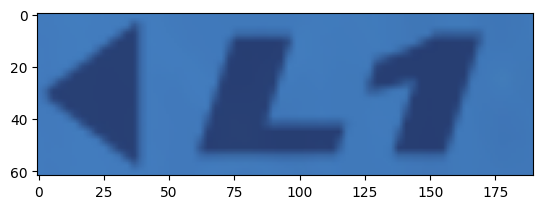

swaping to next save state


In [13]:
sa = SkillAnalyzer(recipes)

sa.cycle()

In [14]:

keys = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
    'enter', 'ctrl', 'alt', 'tab', 'shift', 'backspace', 'capslock', 'esc', 'space', 'delete', 'insert', 'home', 'end', 'up', 'down', 'left', 'right',
    'pageup', 'pagedown', 'printscreen', 'pause', 'numlock', 'scrolllock',
]